In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

### COLOR CHART

In [35]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()

blues = mpl.colormaps["Blues"].resampled(12)
purples = mpl.colormaps["Purples"].resampled(22)
reds = mpl.colormaps["Reds"].resampled(12)
orange = mpl.colormaps["YlOrBr"].resampled(22)
green = mpl.colormaps["YlGn"].resampled(12)
spectrum = mpl.colormaps["viridis"].resampled(3)

In [37]:
c_blues = [blues(i) for i in range(12)]
c_purp = [purples(i) for i in range(22)]
c_red = [reds(i) for i in range(12)]
c_orag = [orange(i) for i in range(22)]
c_spec = [spectrum(i) for i in range(3)]
c_gree = [green(i) for i in range(12)]

### Expectation value ouput

Parameter condition: Matrix size

In [4]:
size = [3]

Parameter condition: beta

In [17]:
#beta = [7.14,8.33,10,12.5,16.66,25,27.78,31.25,35.71,41.67,50,62.5] #standard beta condition
beta = [8.33,10]

Parameter condition: Alpha #1 (discrete alpha)

In [6]:
alp_arr = [0,0.05,0.1,0.2,1]
alp_index = 0

Parameter condition: Alpha #2 (continuous alpha)

In [7]:
alp = np.linspace(0,1,21)
alp_arr = []

for i in range(len(alp)):
    if i % 20 == 0:
        alp_arr.append(int(alp[i]))
    else:
        alp_arr.append(round(alp[i],2))

Parameter condition: Gamma #1 (discrete gamma)

In [28]:
gam = np.linspace(0,1,11)
gam_arr = []

for i in range(len(gam)):
    if i==0:
        gam_arr.append(0)
    elif i==20 or i ==10:
        gam_arr.append(int(gam[i]))
    else:
        gam_arr.append(round(gam[i],2))

Parameter condition: Gamma #2 (continuous gamma)

In [21]:
gam = np.linspace(0,1,21)
gam_arr = []
for i in range(len(gam)):
    if i % 20 == 0:
        gam_arr.append(int(gam[i]))
    else:
        gam_arr.append(round(gam[i],2))

Parameter check

In [15]:
print("gam_arr: ", gam_arr)
print("alp_arr: ", alp_arr)
print("beta: ",beta)
print("size: ",size)

gam_arr:  [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
alp_arr:  [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
beta:  [10, 12.5]
size:  [3]


/tmp/ipykernel_636568/1439222184.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]=pd.read_csv("./Expec/TOA/T_expec_s3_a{}_b{}.txt".format(alp_arr[i],beta[k]),header=None,delim_whitespace=True)
/tmp/ipykernel_636568/1439222184.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]=pd.read_csv("./Expec/TOA/T_expec_s3_a{}_b{}.txt".format(alp_arr[i],beta[k]),header=None,delim_whitespace=True)
/tmp/ipykernel_636568/1439222184.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]=pd.read_csv("./Expec/TOA/T_expec_s3_a{}_b{}.tx

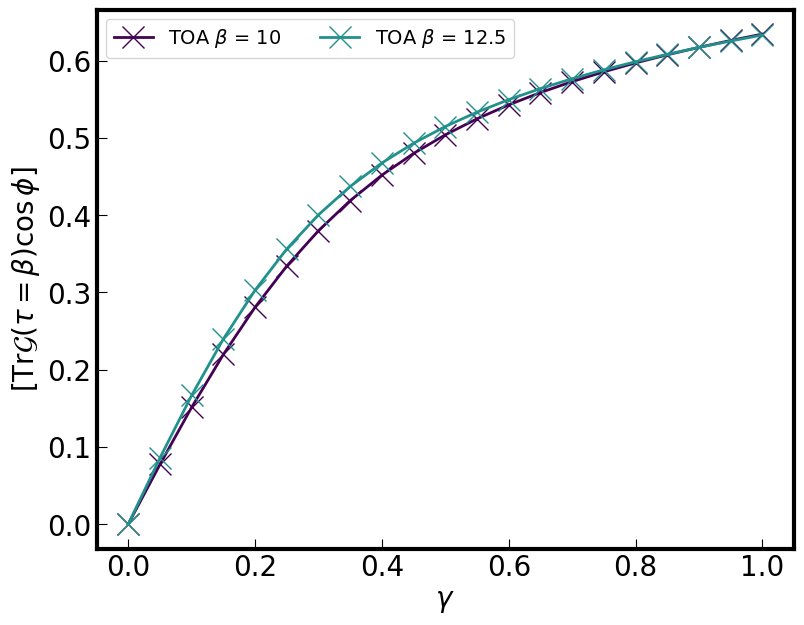

In [11]:
#여기는 데이터에 있는 beta값을 사용해야만 함
fig = plt.figure(figsize=(9,7))
mpl.rcParams['axes.linewidth'] = 3
plt.rcParams.update({'font.size': 20})

plt.xlabel(r'$\gamma$')
plt.ylabel(r'[Tr$\mathcal{G}(\tau=\beta)\cos{\phi}$]')

plt.tick_params(axis='x',direction='in',size=7)
plt.tick_params(axis='y',direction='in',size=7)

#plt.xlim([0,2])

for k in range(len(beta)):
    for i in range(len(alp_arr)):
        globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]=pd.read_csv("./Expec/TOA/T_expec_s3_a{}_b{}.txt".format(alp_arr[i],beta[k]),header=None,delim_whitespace=True)

    plt.plot(globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[2],beta[k])][0],globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[2],beta[k])][1],color=c_spec[k],label = r"TOA $\beta$ = " + str(beta[k]), marker = 'x', markersize = 16, linewidth = 2)

plt.legend(ncol=2,fontsize=14)
#plt.savefig("/home/way_ern/Programs/Plt_img/20250102_TOA/Expec_alp_0.1.pdf",format='pdf',bbox_inches='tight')

Fixed gamma에 대한 T-alpha change

/tmp/ipykernel_636568/3822741864.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()['T_EXPEC_BET{}_GAM_1'.format(int(beta[k]))].append(pd.read_csv("./Expec/TOA/T_expec_s3_a{}_b{}.txt".format(alp_arr[i],beta[k]),header=None,delim_whitespace=True)[1][11]-pd.read_csv("./Expec/TOA/T_expec_s3_a{}_b{}.txt".format(alp_arr[i],beta[k+1]),header=None,delim_whitespace=True)[1][11])
/tmp/ipykernel_636568/3822741864.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()['T_EXPEC_BET{}_GAM_1'.format(int(beta[k]))].append(pd.read_csv("./Expec/TOA/T_expec_s3_a{}_b{}.txt".format(alp_arr[i],beta[k]),header=None,delim_whitespace=True)[1][11]-pd.read_csv("./Expec/TOA/T_expec_s3_a{}_b{}.txt".format(alp_arr[i],beta[k+1]),header=None,delim_whitespace=True)[1][11])
/tmp/ipykernel_636568/3822741864

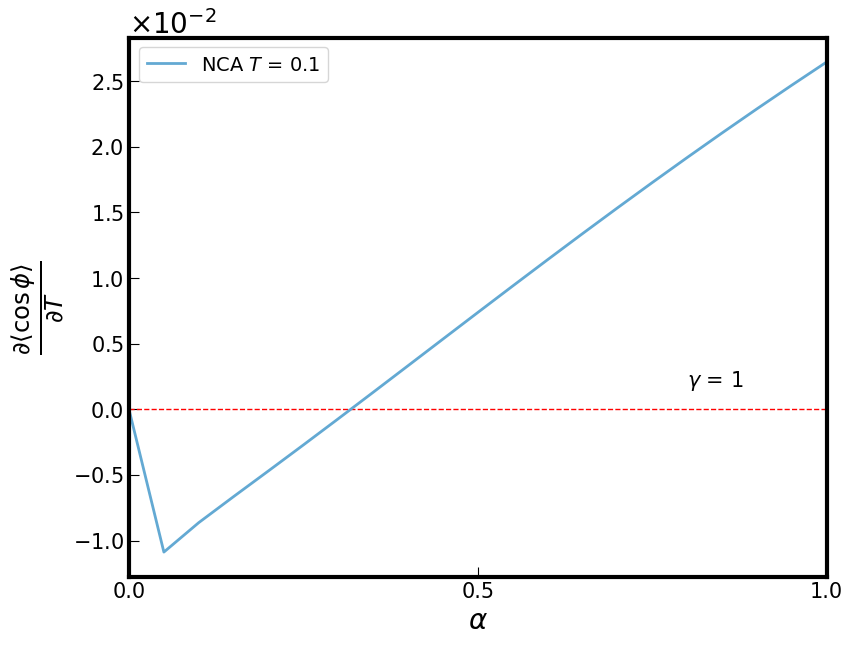

In [12]:
#여기는 데이터에 있는 beta값을 사용해야만 함
fig, ax = plt.subplots(figsize=(9, 7))
mpl.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 15})

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\frac{\partial \langle \cos \phi \rangle}{\partial T}$',fontsize = 25)

plt.xticks(np.linspace(0,2,5))

plt.tick_params(axis='x',direction='in',size=7,labelsize = 15)
plt.tick_params(axis='y',direction='in',size=7,labelsize = 15)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1)) 

ax.yaxis.set_major_formatter(formatter)

plt.xlim([0,1])
plt.text(0.8,0.00175,r"$\gamma$ = 1")
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)

for k in range(len(beta)-1):
    globals()['T_EXPEC_BET{}_GAM_1'.format(int(beta[k]))] = []
    for i in range(len(alp_arr)):
        globals()['T_EXPEC_BET{}_GAM_1'.format(int(beta[k]))].append(pd.read_csv("./Expec/TOA/T_expec_s3_a{}_b{}.txt".format(alp_arr[i],beta[k]),header=None,delim_whitespace=True)[1][11]-pd.read_csv("./Expec/TOA/T_expec_s3_a{}_b{}.txt".format(alp_arr[i],beta[k+1]),header=None,delim_whitespace=True)[1][11])

    plt.plot(alp_arr,globals()['T_EXPEC_BET{}_GAM_1'.format(int(beta[k]))],color=c_blues[11-k],label = r"NCA $T$ = " + str(round(1/beta[k],4)), linewidth = 2)

plt.legend(ncol=2,fontsize=14)
#plt.savefig("/home/way_ern/Programs/Plt_img/20250102_TOA/Diff_gam_1.pdf",format='pdf',bbox_inches='tight')

In [50]:
T_EXPEC_BET8_GAM_1

[-5.575164575333247e-06,
 0.0017214391167200693,
 0.0015873126748000566,
 0.0014990890506200172,
 0.0014328399373000344,
 0.001376553941259906,
 0.0013278244115600968,
 0.0012826252761799495,
 0.0012403760103001371,
 0.001199532294460015,
 0.0011601061389999723,
 0.0011229919965000112,
 0.001086420740559868,
 0.0010510276293200782,
 0.0010166292291200474,
 0.0009827500648799115,
 0.0009492400373398713,
 0.0009160902686999872,
 0.0008847939183201925,
 0.0008535130051600115,
 0.0008223203916198907,
 0.00079185330750009,
 0.0007617533321400138,
 0.0007323524216399369,
 0.0007034071173800394,
 0.0006753511614999708,
 0.0006469368975201562,
 0.0006195778088400328,
 0.0005926346576999864,
 0.000565362037680206,
 0.0005390804676600469,
 0.0005125843907999306,
 0.00048784040544003204,
 0.00046141753681994135,
 0.00043739038007994946,
 0.0004118237587200646,
 0.00038799599658001505,
 0.00036458852646004125,
 0.00034025001044013514,
 0.0003168980773798902,
 0.0002946722022000303,
 0.000271437895

/tmp/ipykernel_602244/2964464544.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename2{}".format(i)] = pd.read_csv("./Difference/TOA/3Dplt_s3_lb{}_n.txt".format(beta[i+1]),header=None,delim_whitespace=True)


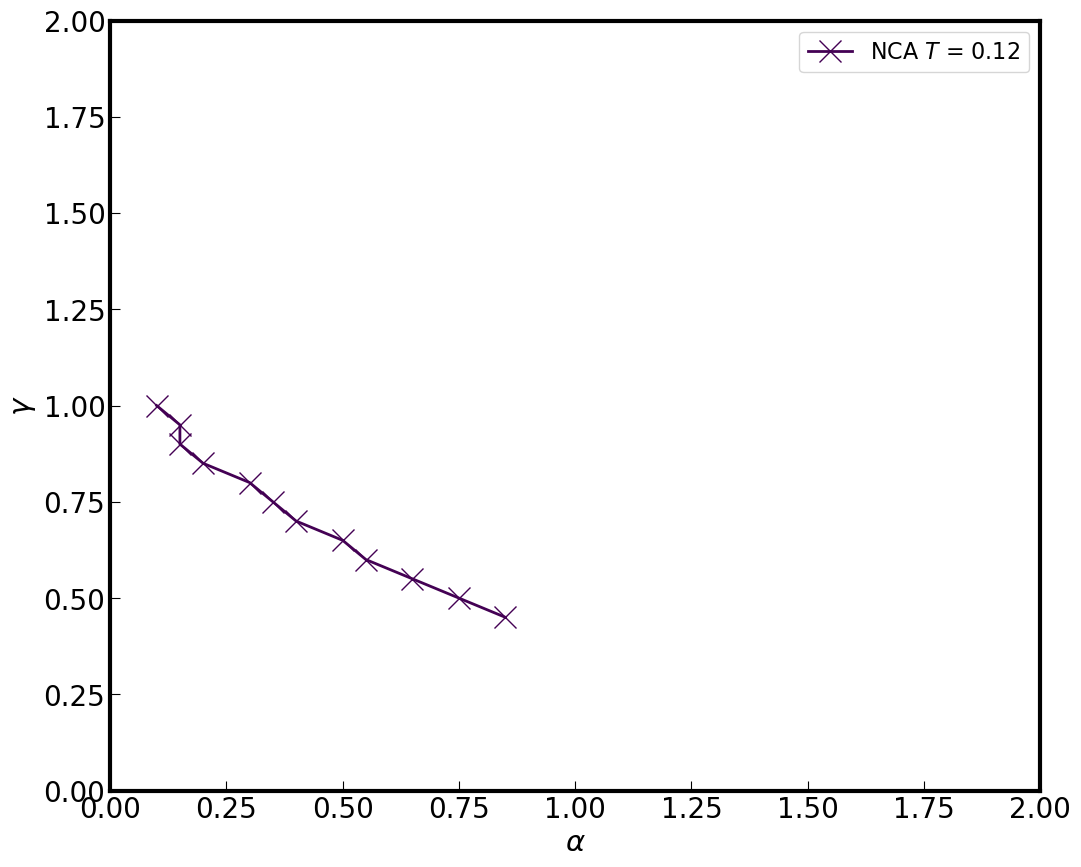

In [20]:
#여기는 데이터에 있는 beta값을 사용해야만 함
fig = plt.figure(figsize=(12,10))
mpl.rcParams['axes.linewidth'] = 3
plt.rcParams.update({'font.size': 20})

plt.tick_params(axis='x',direction='in',size=7)
plt.tick_params(axis='y',direction='in',size=7)



#fn = "./Difference/NCA/3Dplt_s3_lb7.14_n.txt"
#dat = pd.read_csv(fn,header=None,delim_whitespace=True)
#plt.plot(dat[0],dat[1],color="gold",label = r"$\beta$ = 7.14", marker = 'x' , markersize = 10)

for i in range(len(beta)-1):
    globals()["filename{}".format(i)] = []
#    globals()["filename{}".format(i)] = pd.read_csv("./Difference/OCA/3Dplt_s3_lb{}_n.txt".format(beta[i]),header=None,delim_whitespace=True)
    globals()["filename2{}".format(i)] = pd.read_csv("./Difference/TOA/3Dplt_s3_lb{}_n.txt".format(beta[i+1]),header=None,delim_whitespace=True)

    
    if i % 2 != 1:
#        col = 'gray'
        plt.plot(globals()["filename2{}".format(i)][0],globals()["filename2{}".format(i)][1],color=c_spec[i],label = r"NCA $T$ = " + str(np.round(1/beta[i],4)), marker = 'x', markersize = 16, linewidth = 2)
#        plt.plot(globals()["filename{}".format(i)][0],globals()["filename{}".format(i)][1],color=c_os[i],label = r"OCA $T$ = " + str(np.round(1/beta[i],4)), marker = 'o', markersize = 15,mfc='None')
    else:
        plt.plot(globals()["filename2{}".format(i)][0],globals()["filename2{}".format(i)][1],color=c_spec[i],label = r"NCA $T$ = " + str(np.round(1/beta[i],4)), marker = 'x', markersize = 16,mfc='None',linewidth = 2)
#        plt.plot(globals()["filename{}".format(i)][0],globals()["filename{}".format(i)][1],color=c_os[i],label = r"OCA $T$ = " + str(np.round(1/beta[i],4)), marker = 'o', markersize = 15,mfc='None')
    
#plt.title(r"OCA size3 $\alpha$-$\gamma$ plane projection")

plt.xlabel(r'$\alpha$',fontsize = 21)
plt.ylabel(r'$\gamma$',fontsize = 21)

plt.xlim([0,2])
plt.ylim([0,2])
#plt.grid(alpha=0.5)
plt.legend(loc='upper right',ncol=2,fontsize=16)
#plt.savefig("/home/way_ern/Programs/Plt_img/20250102_TOA/3dplot_Ns3_proj_n.pdf",format='pdf',bbox_inches='tight')

In [ ]:
for j in range(len(beta)):
    globals()['MAT_G{}'.format(j)]=pd.read_csv('/home/way_ern/Programs/Plt_scr/20241021_Orderparameter/Cona~Conb/Matelement/N_exp_loc_s3_b{}.txt'.format(beta[j]),header=None,names=['x','a'],delim_whitespace=True)

/tmp/ipykernel_636568/2511229459.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(i)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[i],beta[1]),header=None,delim_whitespace=True)
/tmp/ipykernel_636568/2511229459.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(i)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[i],beta[1]),header=None,delim_whitespace=True)
/tmp/ipykernel_636568/2511229459.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(i)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[i],beta[1]),header=None,delim_whitespac

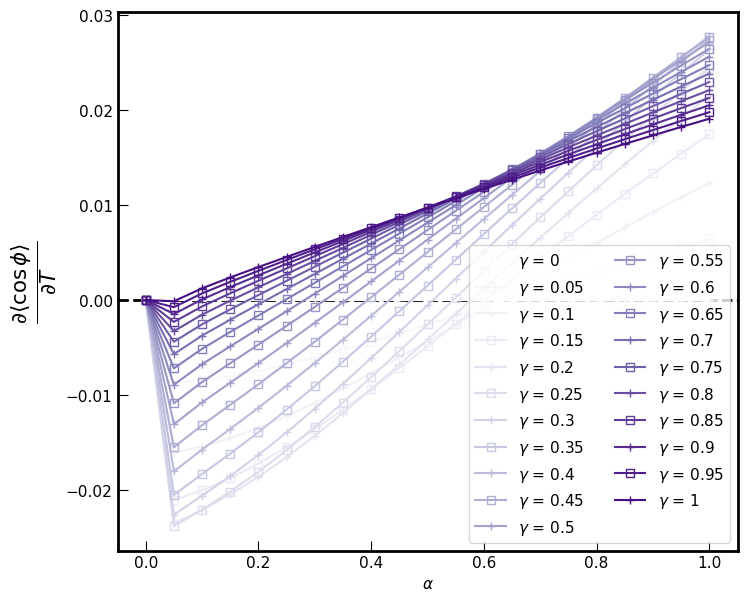

In [13]:
for val in range(1):
    fig = plt.figure(figsize=(8,7))
    mpl.rcParams['axes.linewidth'] = 2

    plt.rcParams.update({'font.size': 11})

    plt.tick_params(axis='x',direction='in',size=7)
    plt.tick_params(axis='y',direction='in',size=7)

    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\frac{\partial \langle \cos \phi \rangle}{\partial T}$',fontsize = 22)

    #plt.xlim([0,2])

    plt.axhline(y=0, color = 'black', linestyle='--', linewidth=2)

        #프레젠테이션용 구간
    #plt.xticks(np.linspace(0,2,5))
    #plt.yticks(np.linspace(0,0.014,7))

    for i in range(len(gam_arr)):
        globals()["filename{}".format(i)] = []
        globals()["filename{}".format(i)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[i],beta[1]),header=None,delim_whitespace=True)
        
        if i%2!=0:
            mark = 's'
        else:
            mark = '+'

        plt.plot(globals()['filename{}'.format(i)][0],globals()['filename{}'.format(i)][1],label = r"$\gamma$ = " + str(gam_arr[i]), color = c_purp[i],marker=mark,mfc='None')#, marker = 'o', mfc = 'None',markersize = 5)

    #plt.text(1.4,-0.01,"OCA, Size : 5",fontsize = 25)

    #plt.title("Difference of orderparameter value between beta {} and {}".format(beta[val],beta[val+1]))
    #plt.grid(alpha=0.5)
    plt.legend(ncol=2)
    #plt.savefig("/home/way_ern/Programs/Plt_img/20241112_Presfold/Cona/Diff_Ns3_b_{}_{}_n.pdf".format(beta[1],beta[2]),format='pdf',bbox_inches='tight')

/tmp/ipykernel_636568/2069981988.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(i)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[i],beta[1]),header=None,delim_whitespace=True)
/tmp/ipykernel_636568/2069981988.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filenameO{}".format(i)] = pd.read_csv("./Difference/OCA/O_diff_s3_g{}_lb{}.txt".format(gam_arr[i],beta[1]),header=None,delim_whitespace=True)
/tmp/ipykernel_636568/2069981988.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filenameN{}".format(i)] = pd.read_csv("./Difference/NCA/N_diff_s3_g{}_lb{}_n.txt".format(gam_arr[i],beta[1]),header=None,delim_white

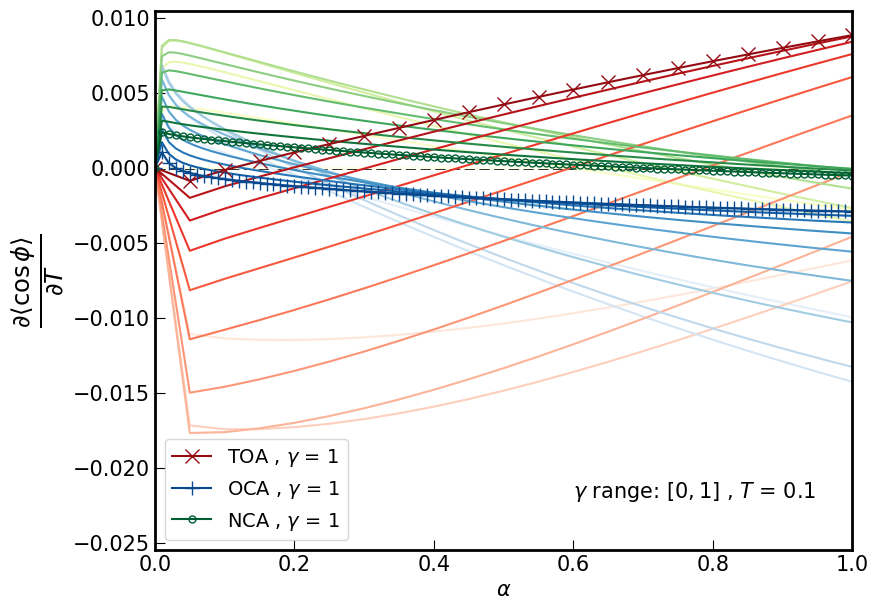

In [48]:
for val in range(1):
    fig = plt.figure(figsize=(9,7))
    mpl.rcParams['axes.linewidth'] = 2

    plt.rcParams.update({'font.size': 15})

    plt.tick_params(axis='x',direction='in',size=7)
    plt.tick_params(axis='y',direction='in',size=7)

    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\frac{\partial \langle \cos \phi \rangle}{\partial T}$',fontsize = 25)

    plt.xlim([0,1])

    plt.axhline(y=0, color = 'black', linestyle='--', linewidth=2)

    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-1, 1)) 

    ax.yaxis.set_major_formatter(formatter)

    for i in range(len(gam_arr)):                
        globals()["filename{}".format(i)] = []
        globals()["filenameO{}".format(i)] = []
        globals()["filenameN{}".format(i)] = []

        globals()["filename{}".format(i)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[i],beta[1]),header=None,delim_whitespace=True)
        globals()["filenameO{}".format(i)] = pd.read_csv("./Difference/OCA/O_diff_s3_g{}_lb{}.txt".format(gam_arr[i],beta[1]),header=None,delim_whitespace=True)
        globals()["filenameN{}".format(i)] = pd.read_csv("./Difference/NCA/N_diff_s3_g{}_lb{}_n.txt".format(gam_arr[i],beta[1]),header=None,delim_whitespace=True)

        if i%2!=0:
            mark = 's'
        else:
            mark = '+'

        if i == (len(gam_arr)-1):
            plt.plot(globals()['filename{}'.format(i)][0],globals()['filename{}'.format(i)][1],label = r"TOA , $\gamma$ = " + str(gam_arr[i]), color = c_red[i], marker = 'x', mfc = 'None',markersize = 10)
            plt.plot(globals()['filenameO{}'.format(i)][0],globals()['filenameO{}'.format(i)][1],label = r"OCA , $\gamma$ = " + str(gam_arr[i]), color = c_blues[i], marker = '+', mfc = 'None',markersize = 10)
            plt.plot(globals()['filenameN{}'.format(i)][0],globals()['filenameN{}'.format(i)][1],label = r"NCA , $\gamma$ = " + str(gam_arr[i]), color = c_gree[i], marker = '.', mfc = 'None',markersize = 10)
        else:
            plt.plot(globals()['filename{}'.format(i)][0],globals()['filename{}'.format(i)][1], color = c_red[i])#, marker = 'o', mfc = 'None',markersize = 5)
            plt.plot(globals()['filenameO{}'.format(i)][0],globals()['filenameO{}'.format(i)][1], color = c_blues[i])#, marker = 'o', mfc = 'None',markersize = 5)
            plt.plot(globals()['filenameN{}'.format(i)][0],globals()['filenameN{}'.format(i)][1], color = c_gree[i])#, marker = 'o', mfc = 'None',markersize = 5)
            
    plt.text(0.6,-0.022,r"$\gamma$ range: $[0,1]$ , $T$ = " + str(np.round(1/beta[1],3)),fontsize = 15)

    #plt.title("Difference of orderparameter value between beta {} and {}".format(beta[val],beta[val+1]))
    #plt.grid(alpha=0.5)
    plt.legend(fontsize=14)
    #plt.savefig("/home/way_ern/Programs/Plt_img/20241018_Orderparameter/Cona/Diff_Ns3_b_{}_{}_n.pdf".format(beta[1],beta[2]),format='pdf',bbox_inches='tight')

/tmp/ipykernel_602244/3901366777.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(j)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[j],beta[1]),header=None,delim_whitespace=True)
/tmp/ipykernel_602244/3901366777.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(j)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[j],beta[1]),header=None,delim_whitespace=True)
/tmp/ipykernel_602244/3901366777.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(j)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[j],beta[1]),header=None,delim_whitespac

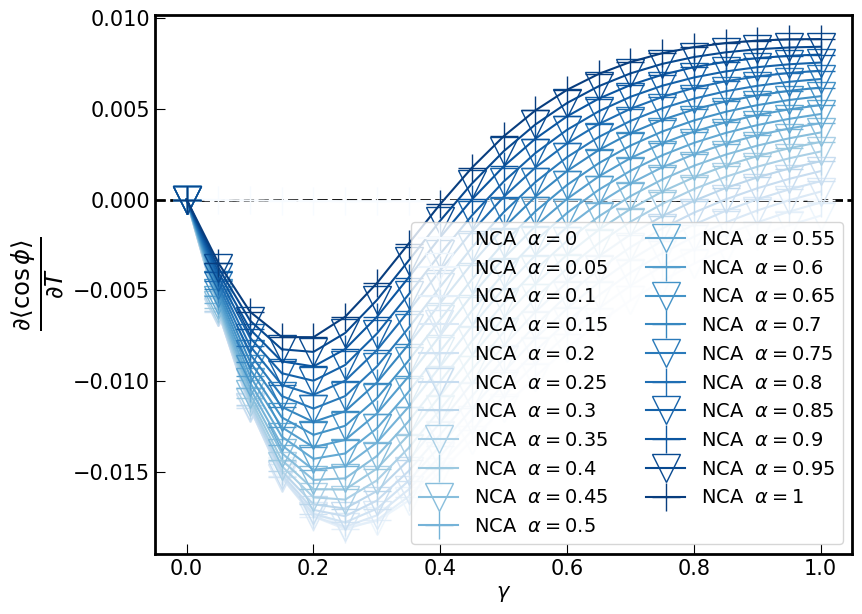

In [37]:
for k in range(1): #이 코드는 데이터가 없는 앞쪽 beta값이 필요함
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 15})

    fig = plt.figure(figsize=(9,7))
    mpl.rcParams['axes.linewidth'] = 2

    plt.xlabel(r'$\gamma$')

    #프레젠테이션용 구간
    #plt.xticks(np.linspace(0,2,5))
    #plt.yticks(np.linspace(0,0.012,5))

    plt.axhline(y=0, color = 'black', linestyle='--', linewidth=2)

    plt.tick_params(axis='x',direction='in',size = 7, labelsize = 15)
    plt.tick_params(axis='y',direction='in',size = 7, labelsize = 15)

    #plt.xlim((0,2))

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 15})

    plt.ylabel(r'$\frac{\partial \langle \cos \phi \rangle}{\partial T}$',fontsize = 25)
    plt.xlabel(r'$\gamma$')
    

    b = 0                                    
    for i in range(len(alp_arr)):
        globals()["filenamee{}".format(i)] = []
        for j in range(len(gam_arr)):
            globals()["filename{}".format(j)] = []
            globals()["filename{}".format(j)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[j],beta[1]),header=None,delim_whitespace=True)
            globals()["filenamee{}".format(i)].append(globals()["filename{}".format(j)][1][i])
        if i % 2 != 0:
            plt.plot(gam_arr,globals()["filenamee{}".format(i)],label="NCA  " + r'$\alpha = $' + str(alp_arr[i]) ,color=c_blues[i],marker='v',markersize = 20, mfc= 'None')
        elif i % 2 == 0 :
            plt.plot(gam_arr,globals()["filenamee{}".format(i)],label="NCA  " + r'$\alpha = $' + str(alp_arr[i]) ,color=c_blues[i],marker='+',markersize = 20, mfc= 'None')

        #df = np.column_stack((gam_arr,globals()["filenamee{}".format(i)]))
        #np.savetxt('./Difference/OCA/O_s3_gamswip_lb{}.txt'.format(beta[i+1]),df)
    #plt.title("Difference of orderparameter value between beta {} and {}, in alpha".format(beta[k],beta[k+1]))
    #plt.grid(alpha=0.5)

    #plt.text(1.6,0.0065,"T = 0.08")

    plt.legend(ncol=2,fontsize=14)
    #plt.savefig("/home/way_ern/Programs/Plt_img/20241112_Presfold/Cona/Diff_gswp_Ns3_b_{}_{}_n.pdf".format(beta[1],beta[2]),format='pdf',bbox_inches='tight')

alpha = 0 인 경우 gamma swap

In [ ]:
MAT_G0

/tmp/ipykernel_393550/839478017.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(j)] = pd.read_csv("./Difference/NCA/N_diff_s3_g{}_lb{}_n.txt".format(gam_arr[j],beta[i+1]),header=None,delim_whitespace=True)
/tmp/ipykernel_393550/839478017.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(j)] = pd.read_csv("./Difference/NCA/N_diff_s3_g{}_lb{}_n.txt".format(gam_arr[j],beta[i+1]),header=None,delim_whitespace=True)
/tmp/ipykernel_393550/839478017.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(j)] = pd.read_csv("./Difference/NCA/N_diff_s3_g{}_lb{}_n.txt".format(gam_arr[j],beta[i+1]),header=None,delim_

IndexError: list index out of range

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

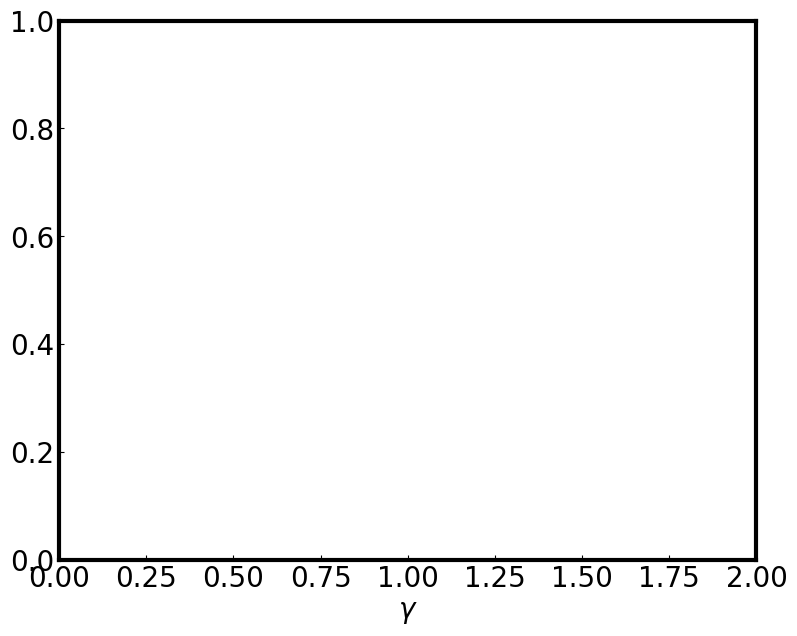

In [61]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(9,7))
mpl.rcParams['axes.linewidth'] = 3

plt.xlabel(r'$\gamma$')

plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')


plt.xlim([0,2])

b = 0                                    
for i in range(len(beta)-1):
    globals()["filenamee{}".format(i)] = []
    for j in range(len(gam_arr)):
        globals()["filename{}".format(j)] = []
        globals()["filename{}".format(j)] = pd.read_csv("./Difference/NCA/N_diff_s3_g{}_lb{}_n.txt".format(gam_arr[j],beta[i+1]),header=None,delim_whitespace=True)
        globals()["filenamee{}".format(i)].append(globals()["filename{}".format(j)][1][0])
    if i % 2 != 0:
        plt.plot(gam_arr,globals()["filenamee{}".format(i)],label="NCA  " + r'$\beta = $' + str(beta[i+1]) ,color=c_spri[b+5],marker='+',markersize = 16, mfc= 'None',linewidth = 3)
    elif i % 2 == 0 :
        plt.plot(gam_arr,globals()["filenamee{}".format(i)],label="NCA  " + r'$\beta = $' + str(beta[i+1]) ,color=c_spri[b+5],marker='*',markersize = 16, mfc= 'None',linewidth =3)
    b+=1

for j in range(len(beta)-1):
    bet = str(beta[j])
    plt.plot(gam_arr,globals()['MAT_G{}'.format(j)]['a']-globals()['MAT_G{}'.format(j+1)]['a'],marker='x',markersize = '9', mfc = 'None',color=c_rs[j+5],label = 'Expec ' + r'$T =$' + bet)

    #df = np.column_stack((gam_arr,globals()["filenamee{}".format(i)]))
    #np.savetxt('./Difference/OCA/O_s3_gamswip_lb{}.txt'.format(beta[i+1]),df)
#plt.title("Difference of orderparameter in alpha = 0")
plt.grid(alpha=0.5)
plt.legend(ncol=2,fontsize=15)
plt.text(0.44,-6.5e-5,"NCA condition : Iteration Var, len(tau_grid) = 2001",fontsize=15)
#plt.savefig("/home/way_ern/Programs/Plt_img/20241018_Orderparameter/Cona/Diff_alp0.pdf",format='pdf',bbox_inches='tight')

3 size matrix H_loc elements plot

In [37]:
for j in range(len(beta)):
    globals()['MAT_G{}'.format(j)]=pd.read_csv('./Matelement/N_Mat_s3_a{}_b{}.txt'.format(alp_arr[5],beta[j]),header=None,names=['x','a','b','c'],delim_whitespace=True)

/tmp/ipykernel_4117765/2456690040.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()['MAT_G{}'.format(j)]=pd.read_csv('./Matelement/N_Mat_s3_a{}_b{}.txt'.format(alp_arr[5],beta[j]),header=None,names=['x','a','b','c'],delim_whitespace=True)
/tmp/ipykernel_4117765/2456690040.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()['MAT_G{}'.format(j)]=pd.read_csv('./Matelement/N_Mat_s3_a{}_b{}.txt'.format(alp_arr[5],beta[j]),header=None,names=['x','a','b','c'],delim_whitespace=True)
/tmp/ipykernel_4117765/2456690040.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()['MAT_G{}'.format(j)]=pd.read_csv('./Matelement/N_Mat_s3_a{}_b{}.txt'.format(alp_arr[5],beta[j]),header=None,

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

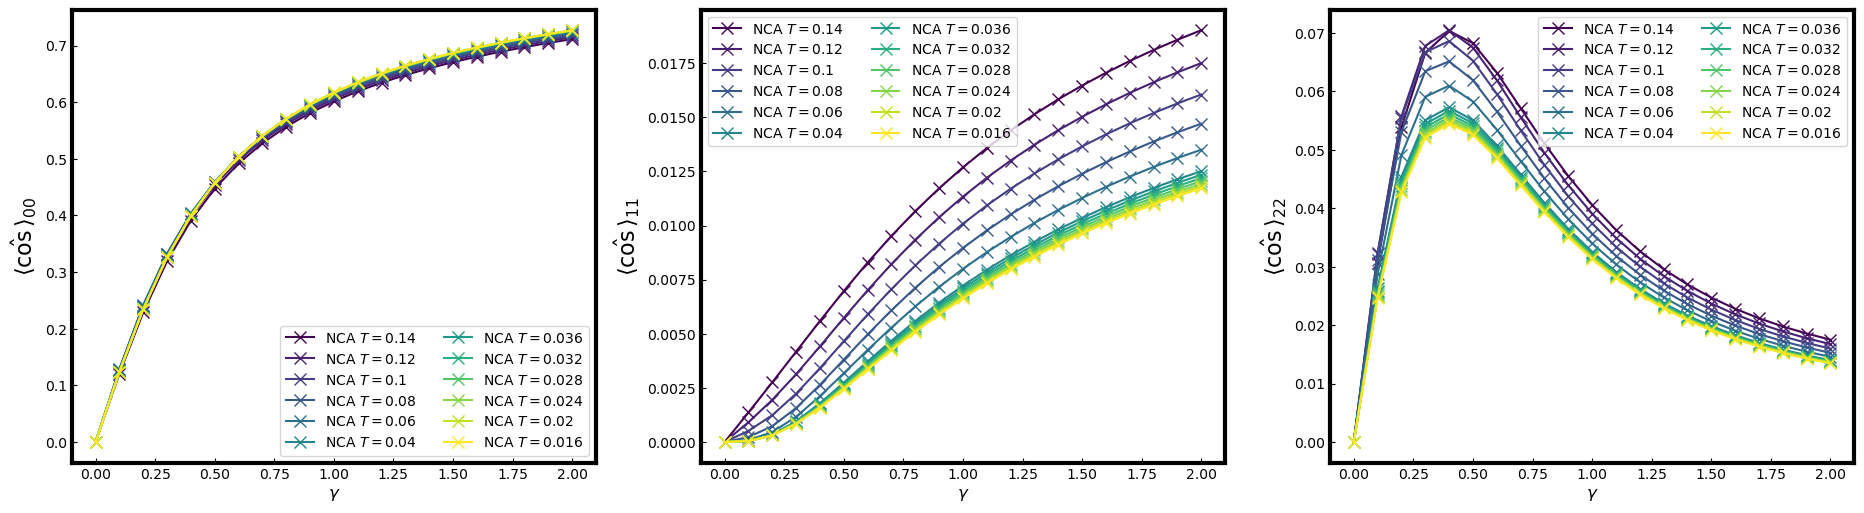

In [38]:
fig = plt.figure(figsize=(23,20))
plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['axes.linewidth'] = 3
plt.rcParams.update({'font.size': 12})
gs = GridSpec(nrows=3, ncols=3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

ax0 = fig.add_subplot(gs[0,0])

for j in range(len(beta)):
    bet = str(round(1/beta[j],3))
    ax0.plot(gam_arr,globals()['MAT_G{}'.format(j)]['a'],marker='x',markersize = '9', mfc = 'None',color=c_spri[j],label = 'NCA ' + r'$T =$' + bet)

plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.yticks(fontsize = 10)
plt.xticks(fontsize =10)
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\langle \hat{\cos} \rangle_{00}$',fontsize=16)
plt.legend(fontsize=10,ncol=2)


ax1 = fig.add_subplot(gs[0,1])
#ax1.set_title(r"$\alpha$ = " + str(0))

for j in range(len(beta)):
    bet = str(round(1/beta[j],3))
    ax1.plot(gam_arr,globals()['MAT_G{}'.format(j)]['b'],marker='x',markersize = '9', mfc = 'None',color=c_spri[j],label = 'NCA ' + r'$T =$' + bet)

plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.yticks(fontsize = 10)
plt.xticks(fontsize =10)
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\langle \hat{\cos} \rangle_{11}$',fontsize=16)
plt.legend(fontsize=10,ncol=2)


ax2 = fig.add_subplot(gs[0,2])

for j in range(len(beta)):
    bet = str(round(1/beta[j],3))
    ax2.plot(gam_arr,globals()['MAT_G{}'.format(j)]['c'],marker='x',markersize = '9', mfc = 'None',color=c_spri[j],label = 'NCA ' + r'$T =$' + bet)

plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.yticks(fontsize = 10)
plt.xticks(fontsize =10)
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\langle \hat{\cos} \rangle_{22}$',fontsize=16)
plt.legend(fontsize=10,ncol=2)

plt.savefig("/home/way_ern/Programs/Plt_img/20241018_Orderparameter/Cona/Matele_Ns3_alp1.pdf",format='pdf',bbox_inches='tight')
